# Car Accidents in the Contiguous United States and Why Americans should consider driving more at night. 
## A data analysis and visualization by Montel Hardy

### The following is the cleaning, analysis, and visualization of a dataset covering nearly three years of car accident data in the United States. The below dataset features about three million accidents spanning 48 states from February 2016 to December 2019, collected by Bing and Mapquest. Below are some of the insights from the data I've visualized, many are included near their visualizations.

* Three times as many accidents havve occurred during the day than at night.
* Severe accidents aren't occuring more frequently at night than during the day.
* For more severe accidents (rating of 3 or 4), there is strong is a correlation between reduced visibility and accident severity.
* States with large populations don't necessarily have a large number of accidents aside from California. Part of this could be due to the accesibility of public transportation in some states.

## References & Disclaimer


  #### Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, arXiv preprint arXiv:1906.05409 (2019).
   
 #### Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. “Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights.” In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.******


#### This dataset is being distributed only for Research purposes, under Creative Commons Attribution-Noncommercial-ShareAlike license (https://creativecommons.org/licenses/by-nc-sa/4.0/).  You may cite the above papers if you use this dataset.*******

#### The dataset can be found here: https://osu.app.box.com/v/us-accidents-dec19

https://creativecommons.org/licenses/by-nc-sa/4.0/

# Getting Started

###  First, I'll confirm that I'm running Python and import the proper libraries. Next, I will read in the csv file.

In [1]:
run python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import plotly.graph_objects as go
import matplotlib.ticker as ticker



print ('All Set!')

All Set!


In [3]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


In [4]:
df=pd.read_csv('../input/2019-accident-data/US_Accidents_Dec19.csv')

us_accidents = df

# Data Cleaning

### First, lets inspect the dataset. By using the shape(), head(), and isnull() functions; we can get a better picture look at our dataset and identify how to best prepare the data for analysis. In the below cell, we discover that 49 columns and just under three million rows make up the shape of our data set.

In [5]:
us_accidents.shape

(2974335, 49)

### We can see a preview of the aforementioned rows and columns below. 

In [6]:
us_accidents.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


### The dataframe produced by the modified isnull() function identifies the amount of rows with missing data for each column. First, rows that have no value or have value that is unintelligible will be deleted from the dataset. As you can see below, there are a good number of columns with missing data. 

### We'll delete a few columns that we won't be using. This process will gave us a dataset with no missing values, a few less columns and still leave over two million accidents for analysis and visualization.

In [7]:
us_accidents.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

### Below is where remove the columns from the dataframe.

In [8]:
us_accidents.drop(['Astronomical_Twilight','Nautical_Twilight','Civil_Twilight','TMC','End_Lng','End_Lat','Number','Wind_Chill(F)',
                  'Precipitation(in)'], axis=1,inplace=True)

In [9]:
us_accidents.dropna(subset=["Sunrise_Sunset","Description","Zipcode","Timezone",
                            "Airport_Code","Weather_Timestamp","Temperature(F)","Humidity(%)","Pressure(in)","Visibility(mi)",
                           "Wind_Direction","Weather_Condition"], axis=0, how= 'any',inplace= True)

In [10]:
us_accidents.drop(['Wind_Speed(mph)'], axis=1,inplace=True)

### After dropping the necessary columns and rows, our data no longer has missing values. We'll use the shape() function to ensure that we still have a very large amount of clean data to work with. With that said, the next part of this project.

In [11]:
us_accidents.isnull().sum()

ID                   0
Source               0
Severity             0
Start_Time           0
End_Time             0
Start_Lat            0
Start_Lng            0
Distance(mi)         0
Description          0
Street               0
Side                 0
City                 0
County               0
State                0
Zipcode              0
Country              0
Timezone             0
Airport_Code         0
Weather_Timestamp    0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [12]:
us_accidents.shape

(2881492, 39)

# Data Visualization

### For our first visualization we'll use the US map to visualize the accident data across the 48 states. In order to do this, we have to read in a world map file and download a GeoJSON file.

In [13]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [14]:
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [15]:
state_count = pd.value_counts(df['State'])

fig = go.Figure(data=go.Choropleth(
    locations=state_count.index,
    z = state_count.values.astype(float),  
    locationmode = 'USA-states',     
    colorscale = 'plasma',
    colorbar_title = "Count",
))

fig.update_layout(
    title_text = 'United States Accidents Visualization (2016-2019)',
    geo_scope='usa', 
)

fig.show()



### The above map shows us that California, Texas, and Florida have the largest amount of car accidents. After those three the totals of the rest of the high-accident states seem to level off a bit.

### To get a better look at states with high car accident numbers, I created a top ten list. I used the groupby function to gather these numbers in a dataframe. I varied the colors to make it look more visually apealling.

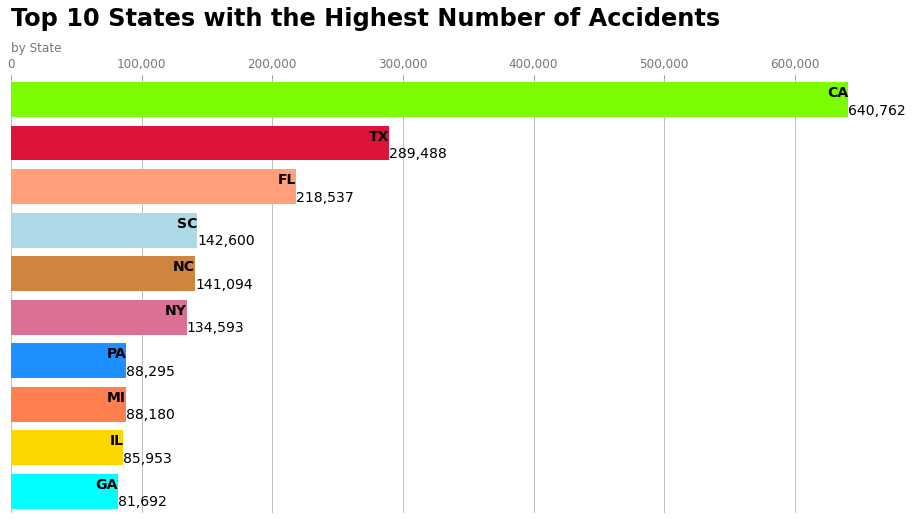

In [16]:


df_top = df.groupby('State').size().to_frame('Counts')
df_top = df_top.reset_index().sort_values('Counts', ascending = False)[:10]
df_top = df_top[::-1]   

colors = ['cyan', 'gold', 'coral', 'dodgerblue',
     'palevioletred', 'peru', 'lightblue', 'lightsalmon','crimson', 'lawngreen',]

fig, ax=plt.subplots(figsize=(15,8))
ax.barh(df_top['State'], df_top['Counts'], color = colors)

for i, (value, name) in enumerate(zip(df_top['Counts'], df_top['State'])):
        ax.text(value, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value, i-.25,     f'{value:,.0f}',  size=14, ha='left',  va='center')
        
ax.text(0, 1.06, 'by State', transform=ax.transAxes, size=12, color='#777777')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks_position('top')
ax.tick_params(axis='x', colors='#777777', labelsize=12)
ax.set_yticks([])
ax.margins(0, 0.01)
ax.grid(which='major', axis='x', linestyle='-')
ax.set_axisbelow(True)
ax.text(0, 1.12, 'Top 10 States with the Highest Number of Accidents',
            transform=ax.transAxes, size=24, weight=600, ha='left')
plt.box(False)



In [17]:
us_accidents.columns = list(map(str, us_accidents.columns))

In [18]:
us_accidents['Sunrise_Sunset'].unique()


array(['Night', 'Day'], dtype=object)

### Next, we explore the relationship betwwen the frequency of accidents by part of day (day or night). I use the groupby() function to gather the data, then I visualize it with a bar chart.

In [19]:
us_accidents.groupby('Sunrise_Sunset').size()


Sunrise_Sunset
Day      2127689
Night     753803
dtype: int64

Text(0, 0.5, 'Time of Day')

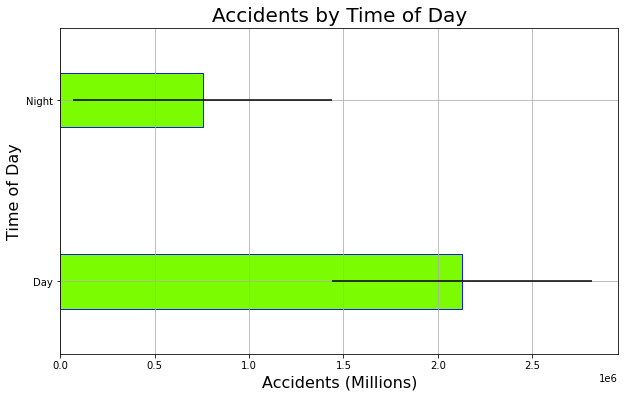

In [20]:

df.groupby('Sunrise_Sunset').size().plot(kind = 'barh', 
                                  color= 'lawngreen',
                                 align = 'center',
                                edgecolor = 'b',
                                 linewidth = 0.9,
                                 width = 0.3,
                                xerr=np.std(df.groupby('Sunrise_Sunset').size()),
                                 grid = True,figsize=(10, 6));


plt.title('Accidents by Time of Day', fontsize=20)
plt.xlabel('Accidents (Millions)', fontsize=16)
plt.ylabel('Time of Day', fontsize=16)


### These findings are very interesting because they may dispute with conventional beliefs. Due to the potential for less visibility, many people may fear night driving and try to avoid driving after sunset.

### Conversely, one could say a good reason for this data is because generally people drive more during the day. However, the data set we're working with didn't quantify how many drivers were on the road during each day part. Additionally, if we assume that statement to be true, thats would support the decision to drive more at night. The following visualizations deal with other factors surrounding accidents.  

### In the below scatter plot, we shift gears to analyze the impact visibility has on accident severity in the boxplot below.

In [21]:
df_sev_day= us_accidents[['Severity','Sunrise_Sunset']]

Text(0, 0.5, 'Visibility (mi)')

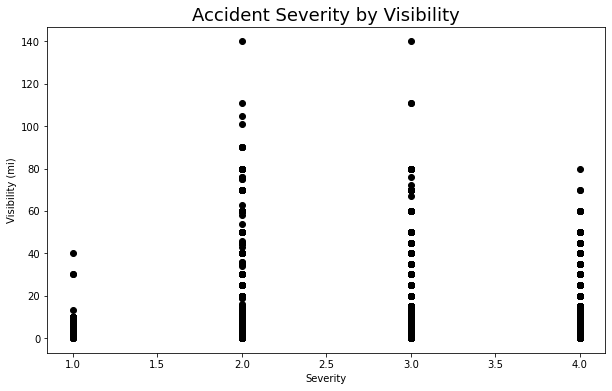

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Accident Severity by Visibility', fontsize=18)
ax.plot(df['Severity'], df['Visibility(mi)'], 'ko');
plt.xlabel("Severity")
plt.ylabel('Visibility (mi)')


### In the above scatter plot, I examine the relationship between Severity and Visibility. The easy takeaway from this distribution and is that most accidents occuring in the dataset have a severity of either two or three. The next takeaway is, more serious accidents are on a decline if there's more than 80 miles of visibility do drivers. So the most actionable insights here are to not speed through curves, uphill roads, downhill rows, or in dense fog. Extreme caution must be used when approaching driving scenarios with less visibility.

Text(0, 0.5, 'Day Part')

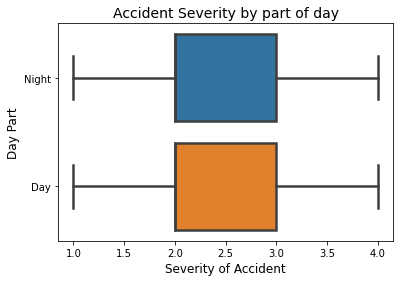

In [23]:
sns.boxplot(x='Severity', y='Sunrise_Sunset', data=df_sev_day, linewidth=2.5)
plt.title('Accident Severity by part of day', fontsize=14)
plt.xlabel('Severity of Accident', fontsize=12)
plt.ylabel('Day Part', fontsize=12)

### This last visualization just confirms accident severity does not differ by time of day. While the scatter plot has proved a lack of visibility can increase the likelihood of higher severity accidents, this visibility shouldn't be directly attributed to night driving.

# Conclusion


### This notebook featured data cleaning, analysis, and visualization of a car accident dataset with well over two million entries. This was a fun, timely datasets with some insights that may be worth sharing with a friend, coworker, or family member. 


### Thanks for reading and be safe!

### - Montel N. Hardy
